# Calculating the Environmental Impact of Power Plants

**Table of contents**
- Overview
- Setup
  - Authentication Token
- Use Case
  - Coal-Fired Power Plant Type
  - Natural Gas-Fired Power Plant Type
  - Oil-Fired Power Plant Type
  - Biomass-Fired Power Plant Type
  - Comparison of Emissions Between Power Plant Types
- Related Links

## Overview

The **IBM Envizi - Emissions API, Stationary Emissions API** is used in this sample application.

This notebook illustrates how to calculate greenhouse gas emissions for different types of power plants. In the energy sector, emissions can vary significantly depending on the type of fuel used and the energy content that is associated with that fuel. The API allows us to calculate emissions based on the fuel type and fuel consumption amount.

The primary focus of this notebook is calculating emissions for different fuel types such as coal, oil, natural gas, and biomass, based on a given energy consumption using the **Stationary Emissions API**.

Read this example to learn how to complete the following tasks:
- Input specific fuel data and energy content for various fuels.
- Retrieve and analyze emissions data based on the given energy content.
- Understand the impact of different fuels on overall GHG emissions in the power sector.

**Business value**

By leveraging these calculations, organizations can make data-driven decisions about fuel choices and their corresponding environmental impact, contributing to more sustainable energy generation.

**Use Case**

In this notebook, an example of Calculating the environmental impact of power plants will be used to identify oppurtunities for carbon reduction through efficiency improvemnets or cleaner fuel alternatives.

For more information on the Emissions API Stationary Endpoint inputs and the output data points, see [Emissions API Developer Guide]().


![Alt text](power_plant.png "Power Plant")

## Setup

Ensure that Python 3+ is installed on your system.


<b>Note:</b> To run this notebook, you must first add your credentials to `'../../../../auth/secrets.ini'` in the following format:

```
[EAPI]
api.api_key = <Your Emissions API Key>
api.tenant_id = <Your Emissions API Tenant Id>
api.org_id = <Your Emissions API Org Id>

```

In [ ]:
# Install the prerequisite Python packages
%pip install pandas configparser IPython requests

In [4]:
import pandas as pd
import configparser
import requests
import json
from IPython.display import display as display_summary

### Authorization Token

Run the following code snippet to generate a Bearer Token by using your api_key configured in secrets.ini.

In [5]:
config = configparser.RawConfigParser()
config.read(['../../../../auth/secrets.ini','../../../../auth/config.ini'])

EAPI_API_KEY        = config.get('EAPI', 'api.api_key')
EAPI_TENANT_ID      = config.get('EAPI', 'api.tenant_id')
EAPI_CLIENT_ID      = 'ghgemissions-' + EAPI_TENANT_ID
EAPI_ORG_ID         = config.get('EAPI', 'api.org_id')

EAPI_AUTH_CLIENT_ID = 'saascore-' + EAPI_TENANT_ID
EAPI_AUTH_ENDPOINT  = config.get('EAPI', 'api.auth_endpoint')

EAPI_BASE_URL       = config.get('EAPI', 'api.base_url')
EAPI_ENDPOINT       = f"{EAPI_BASE_URL}/stationary"

auth_request_headers: dict = {}
auth_request_headers["X-IBM-CLIENT-ID"] = EAPI_AUTH_CLIENT_ID
auth_request_headers["X-API-KEY"] = EAPI_API_KEY

verify = True

auth_url = f"{EAPI_AUTH_ENDPOINT}?orgId={EAPI_ORG_ID}"
              
response = requests.get(url = auth_url,
                        headers = auth_request_headers,
                        verify  = verify
                       )
if response.status_code == 200:
    jwt_token = response.text
    print("Authentication Success")
else:     
    print("Authentication Failed")
    print(response.text)

Authentication Success


## Use Case

### Coal-Fired Power Plant Type

You can measure the impact of a coal-fired power plant on the environment. In this example, the coal-fired power plant uses the lignite as fuel and the energy content is 5 GigaJoules (GJ). The output is the measurement of all the Greenhouse Gas Emissions.

In [3]:
fuel_type = "Coal - Lignite"
energy_value = 5
energy_unit = "GJ"  #Giga Joule

In [4]:
lignite_payload = {
  "activity": {
    "type": fuel_type,
    "value": energy_value,
    "unit": energy_unit
  },
  "location": {
    "country": "USA",
    "stateProvince": "New York"
  },
  "time": {
    "date": "2025-01-01"
  }
}
       
print("Requests payload is :", json.dumps(lignite_payload, indent=2))   

Requests payload is : {
  "activity": {
    "type": "Coal - Lignite",
    "value": 5,
    "unit": "GJ"
  },
  "location": {
    "country": "USA",
    "stateProvince": "New York"
  },
  "time": {
    "date": "2025-01-01"
  }
}


In [5]:
# Create the query headers
request_headers: dict = {}
request_headers["Content-Type"] = "application/json"
request_headers["x-ibm-client-id"] = EAPI_CLIENT_ID
request_headers["Authorization"] = "Bearer " + jwt_token

In [6]:
# Submit the request
lignite_response = requests.post(EAPI_ENDPOINT, 
                                 headers = request_headers, 
                                 data = json.dumps(lignite_payload))

In [7]:
if lignite_response.text != "":
    # Get the response as json
    response_json = lignite_response.json()
    
    # Get json and convert to dataframe
    json_str = json.dumps(response_json)
    dict = json.loads(json_str)
    dataframe = pd.json_normalize(dict) 
    
    # display
    print("\n\n")
    pd.set_option('display.max_colwidth', None)
    display( dataframe) 
else:
    print("Empty Response")

,transactionId,totalCO2e,CO2,CH4,N2O,unit,description
0,77a08ab4-b506-443c-a72f-755a9a6cf41e,466.572457,463.103446,1.459638,2.009372,kgCO2e,The coal - lignite emissions factor used to calculate this result was obtained from the year 2025 GHG - EPA factor set for the area Earth.


### Natural Gas-Fired Power Plant Type

You can measure the impact of a natural gas-fired power plant on the environment. In this example, the natural gas-fired power plant uses natural gas as fuel and the energy content is 5 GigaJoules. The output is the measurement of all the Greenhouse Gas Emissions.

In [8]:
fuel_type = "Natural Gas"
energy_content = "5" 
energy_unit = "GJ"  #Giga Joule

In [9]:
natural_gas_payload = {
  "activity": {
    "type": fuel_type,
    "value": energy_value,
    "unit": energy_unit
  },
  "location": {
    "country": "USA",
    "stateProvince": "New York"
  },
  "time": {
    "date": "2025-01-01"
  }
}
       
print("Requests payload is :", json.dumps(natural_gas_payload, indent=2)) 

Requests payload is : {
  "activity": {
    "type": "Natural Gas",
    "value": 5,
    "unit": "GJ"
  },
  "location": {
    "country": "USA",
    "stateProvince": "New York"
  },
  "time": {
    "date": "2025-01-01"
  }
}


In [10]:
# Submit the request
natural_gas_response = requests.post(EAPI_ENDPOINT, 
                                     headers = request_headers, 
                                     data = json.dumps(natural_gas_payload))

In [11]:
if natural_gas_response.text != "":
    # Get the response as json
    response_json = natural_gas_response.json()
    
    # Get json and convert to dataframe
    json_str = json.dumps(response_json)
    dict = json.loads(json_str)
    dataframe = pd.json_normalize(dict) 
    
    # display
    print("\n\n")
    pd.set_option('display.max_colwidth', None)
    display( dataframe) 
else:
    print("Empty Response")

,transactionId,totalCO2e,CO2,CH4,N2O,unit,description
0,f3ef793d-1a7f-48ad-9f98-23de35bae7a2,251.714163,251.455883,0.132694,0.125586,kgCO2e,The natural gas emissions factor used to calculate this result was obtained from the year 2025 GHG - EPA factor set for the area Earth.


### Oil-Fired Power Plant Type

You can measure the impact of an oil-fired power plant on the environment. In this example, the oil-fired power plant uses crude oil as fuel and the energy content is 5 GigaJoules.  The output is the measurement of all the Greenhouse Gas Emissions.

In [12]:
fuel_type = "Crude Oil"
energy_content = "5"
energy_unit = "GJ"  #Giga Joule

In [13]:
crude_oil_payload = {
  "activity": {
    "type": fuel_type,
    "value": energy_value,
    "unit": energy_unit
  },
  "location": {
    "country": "USA",
    "stateProvince": "New York"
  },
  "time": {
    "date": "2025-01-01"
  }
}
       
print("Requests payload is :", json.dumps(crude_oil_payload, indent=2))  

Requests payload is : {
  "activity": {
    "type": "Crude Oil",
    "value": 5,
    "unit": "GJ"
  },
  "location": {
    "country": "USA",
    "stateProvince": "New York"
  },
  "time": {
    "date": "2025-01-01"
  }
}


In [14]:
# Submit the request
crude_oil_response = requests.post(EAPI_ENDPOINT, 
                                   headers = request_headers, 
                                   data = json.dumps(crude_oil_payload))

In [15]:
if crude_oil_response.text != "":
    # Get the response as json
    response_json = crude_oil_response.json()
    
    # Get json and convert to dataframe
    json_str = json.dumps(response_json)
    dict = json.loads(json_str)
    dataframe = pd.json_normalize(dict) 
    
    # display
    print("\n\n")
    pd.set_option('display.max_colwidth', None)
    display( dataframe) 
else:
    print("Empty Response")

,transactionId,totalCO2e,CO2,CH4,N2O,unit,description
0,1b15eb3b-ff9d-42c8-9b25-9c983c3608ed,354.403039,353.251442,0.398083,0.753515,kgCO2e,The crude oil emissions factor used to calculate this result was obtained from the year 2025 GHG - EPA factor set for the area Earth.


### Biomass-Fired Power Plant Type

You can measure the impact of a biomass-fired power plant on the environment. In this example, the biomass-fired power plant uses wood or wood residuals as the fuel and the energy content is 5 GigaJoules.

In [16]:
fuel_type = "Biomass - Wood and Wood Residuals"
energy_content = "5" 
energy_unit = "GJ"  #Giga Joule

In [17]:
biomass_payload = {
  "activity": {
    "type": fuel_type,
    "value": energy_value,
    "unit": energy_unit
  },
  "location": {
    "country": "USA",
    "stateProvince": "New York"
  },
  "time": {
    "date": "2025-01-01"
  }
}
       
print("Requests payload is :", json.dumps(biomass_payload, indent=2))    

Requests payload is : {
  "activity": {
    "type": "Biomass - Wood and Wood Residuals",
    "value": 5,
    "unit": "GJ"
  },
  "location": {
    "country": "USA",
    "stateProvince": "New York"
  },
  "time": {
    "date": "2025-01-01"
  }
}


In [18]:
# Submit the request
biomass_response = requests.post(EAPI_ENDPOINT, 
                                 headers = request_headers, 
                                 data = json.dumps(biomass_payload))

In [19]:
if biomass_response.text != "":
    # Get the response as json
    response_json = biomass_response.json()
    
    # Get json and convert to dataframe
    json_str = json.dumps(response_json)
    dict = json.loads(json_str)
    dataframe = pd.json_normalize(dict) 
    
    # display
    print("\n\n")
    pd.set_option('display.max_colwidth', None)
    display( dataframe) 
else:
    print("Empty Response")

,transactionId,totalCO2e,CO2,CH4,N2O,unit,description
0,8dbe659a-fcf9-4307-993c-f79ad794a454,450.002718,444.526231,0.9554,4.521088,kgCO2e,The biomass - wood and wood residuals emissions factor used to calculate this result was obtained from the year 2025 GHG - EPA factor set for the area Earth.


### Comparison of Emissions Between Power Plant Types

Based on the carbon emissions measured for each of the power plant types, now we can compare the emission levels and analyze the impact on the environment.
For this task, we plot a graph of emissions by the power plant types and analyze the results in the graph.

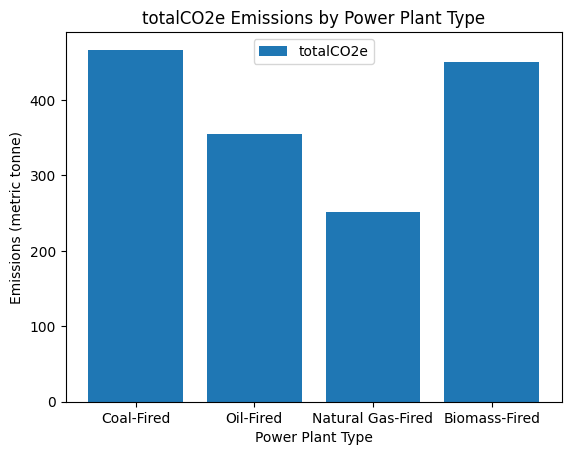

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Data
labels = ['Coal-Fired', 'Oil-Fired', 'Natural Gas-Fired', 'Biomass-Fired']
co2e = [lignite_response.json()['totalCO2e'], crude_oil_response.json()['totalCO2e'], natural_gas_response.json()['totalCO2e'], biomass_response.json()['totalCO2e']]
fig, ax = plt.subplots()

# Stacked Bar Chart
ax.bar(labels, co2e, label='totalCO2e')

ax.set_xlabel('Power Plant Type')
ax.set_ylabel('Emissions (metric tonne)')
ax.set_title('totalCO2e Emissions by Power Plant Type')
ax.legend()

plt.show()

## Related Links

[Emissions API Developer Guide]()